In [27]:
#Importe de las librerías a usar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from datetime import date
import seaborn as sns

In [28]:
#lectura del archivo total_victimas.xlsx y conversión de la hoja HECHOS a dataframe
archivo = 'victimas.xlsx'

df_victimas = pd.read_excel(archivo)

df_victimas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     663 non-null    object        
 1   FECHA                  663 non-null    datetime64[ns]
 2   AAAA                   663 non-null    int64         
 3   MM                     663 non-null    int64         
 4   DD                     663 non-null    int64         
 5   ROL                    663 non-null    object        
 6   VICTIMA                663 non-null    object        
 7   SEXO                   663 non-null    object        
 8   EDAD                   663 non-null    int64         
 9   FECHA_FALLECIMIENTO    663 non-null    object        
 10  N_VICTIMAS             663 non-null    int64         
 11  HORA                   663 non-null    object        
 12  HH                     663 non-null    int64         
 13  TIPO_

In [115]:
df_victimas['AAAA'].value_counts()

AAAA
2018    141
2017    133
2016    130
2021     93
2019     91
2020     75
Name: count, dtype: int64

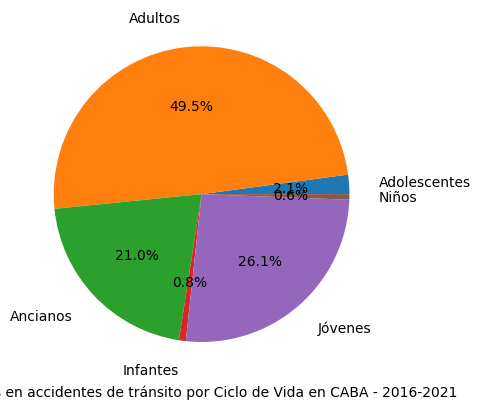

In [29]:
#Crear la varaible Ciclo de vida
# Definir los límites de los rangos:
Infantes = (df_victimas['EDAD'] >= 1) & (df_victimas['EDAD'] < 6)
Niños = (df_victimas['EDAD'] >= 6) & (df_victimas['EDAD'] < 12)
Adolescentes = (df_victimas['EDAD'] >= 12) & (df_victimas['EDAD'] < 18)
Jovenes = (df_victimas['EDAD'] >= 18) & (df_victimas['EDAD'] < 29)
Adultos = (df_victimas['EDAD'] >= 29) & (df_victimas['EDAD'] < 60)
Ancianos = (df_victimas['EDAD'] >= 60)

# Crear una nueva columna 'ciclo_vida' acorde a los límites definidos
df_victimas.loc[Infantes, 'ciclo_vida'] = 'Infantes'
df_victimas.loc[Niños, 'ciclo_vida'] = 'Niños'
df_victimas.loc[Adolescentes, 'ciclo_vida'] = 'Adolescentes'
df_victimas.loc[Jovenes, 'ciclo_vida'] = 'Jóvenes'
df_victimas.loc[Adultos, 'ciclo_vida'] = 'Adultos'
df_victimas.loc[Ancianos, 'ciclo_vida'] = 'Ancianos'

#Indentificar la cantidad de victimas mortales en accidentes de tránsito por ciclo de vida
victimas_edad = df_victimas['ciclo_vida'].value_counts().sort_index()
name='Adolescentes','Adultos','Ancianos','Infantes','Jóvenes','Niños'

# Graficar los datos
plt.pie(victimas_edad, labels=name, labeldistance=1.2,autopct="%1.1f%%")
plt.xlabel("Muertes en accidentes de tránsito por Ciclo de Vida en CABA - 2016-2021")
plt.savefig("muertes_edad.png")
plt.show()

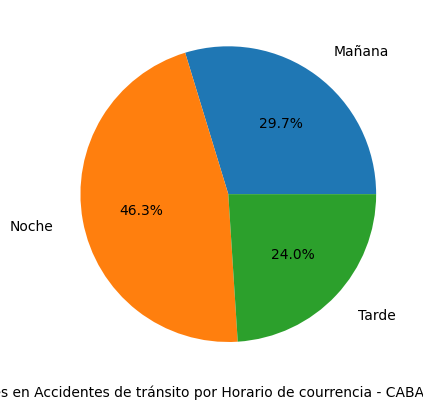

In [30]:
# Definir los límites de los rangos horarios (mañana, tarde, noche)
horas_manana = (df_victimas['HH'] >= 6) & (df_victimas['HH'] < 12)
horas_tarde = (df_victimas['HH'] >= 12) & (df_victimas['HH'] < 18)
horas_noche = (df_victimas['HH'] >= 18) | (df_victimas['HH'] < 6)

# Crear una nueva columna 'Horario' basada en los límites definidos
df_victimas.loc[horas_manana, 'Horario'] = 'Mañana'
df_victimas.loc[horas_tarde, 'Horario'] = 'Tarde'
df_victimas.loc[horas_noche, 'Horario'] = 'Noche'

# Calcular la distribución de accidentes por rango horario
distribucion_Horario = df_victimas['Horario'].value_counts().sort_index()

name='Mañana','Noche','Tarde'
# Graficar los datos
plt.pie(distribucion_Horario, labels=name, labeldistance=1.2,autopct="%1.1f%%")
plt.xlabel("Muertes en Accidentes de tránsito por Horario de courrencia - CABA 2016-2021")
plt.savefig("muertes_horario.png")
plt.show()

In [31]:
# Se crea la variable semestre:
primer_semestre = (df_victimas['MM'] >= 1) & (df_victimas['MM'] <= 6)
segundo_semestre = (df_victimas['MM'] >= 7) & (df_victimas['MM'] <= 12)

# Crear una nueva columna 'Horario' basada en los límites definidos
df_victimas.loc[primer_semestre, 'Semestre'] = 'Primer semestre'
df_victimas.loc[segundo_semestre, 'Semestre'] = 'Segundo semestre'

df_victimas['Semestre'].value_counts()

# Calcular la distribución de accidentes por rango horario
#distribucion_semestre = df_victimas['MM'].value_counts().sort_index()

#name='Primer semestre','Segundo semestre'
# Graficar los datos
#plt.pie(distribucion_semestre, labels=name, labeldistance=1.2,autopct="%1.1f%%")
#plt.xlabel("Muertes en Accidentes de tránsito por Horario de courrencia - CABA 2016-2021")
#plt.savefig("muertes_horario.png")
#plt.show()

Semestre
Segundo semestre    343
Primer semestre     320
Name: count, dtype: int64

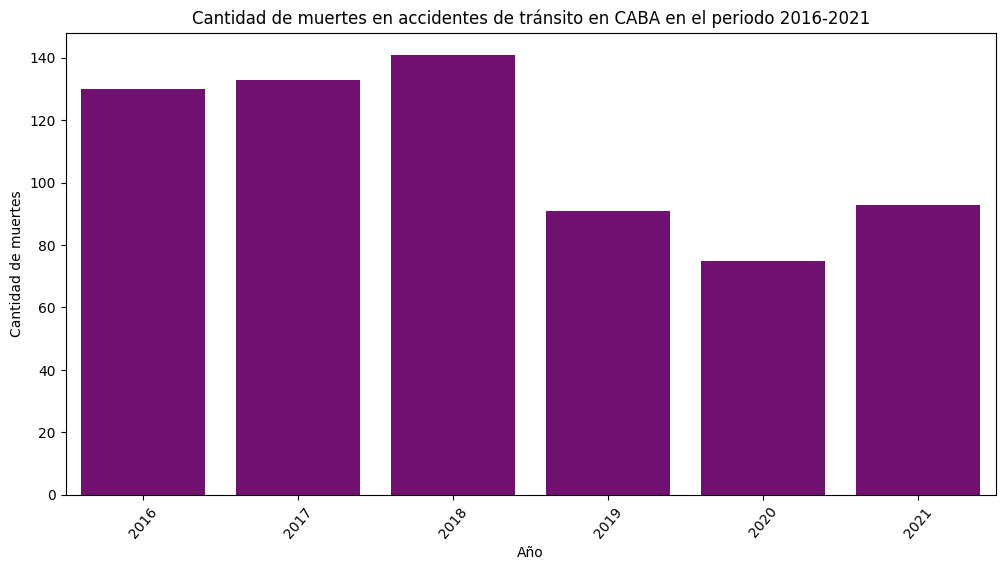

In [86]:
#Identificar la cantidad de victimas mortales en accidentes de tránsito por año en el periodo investigado
victimas_año = df_victimas['AAAA'].value_counts().sort_index()
# Se ajusta el tamaño del gráfico
plt.figure(figsize=(12, 6))  

# Definición de los parámetors para Graficar los datos
sns.barplot(x=victimas_año.index, y=victimas_año.values, color='purple')
plt.xticks(rotation=50)

plt.xlabel('Año')
plt.ylabel('Cantidad de muertes')
plt.title('Cantidad de muertes en accidentes de tránsito en CABA en el periodo 2016-2021')
#Se guarda en el PC la gráfica
plt.savefig('muertes_año.png')

plt.show()


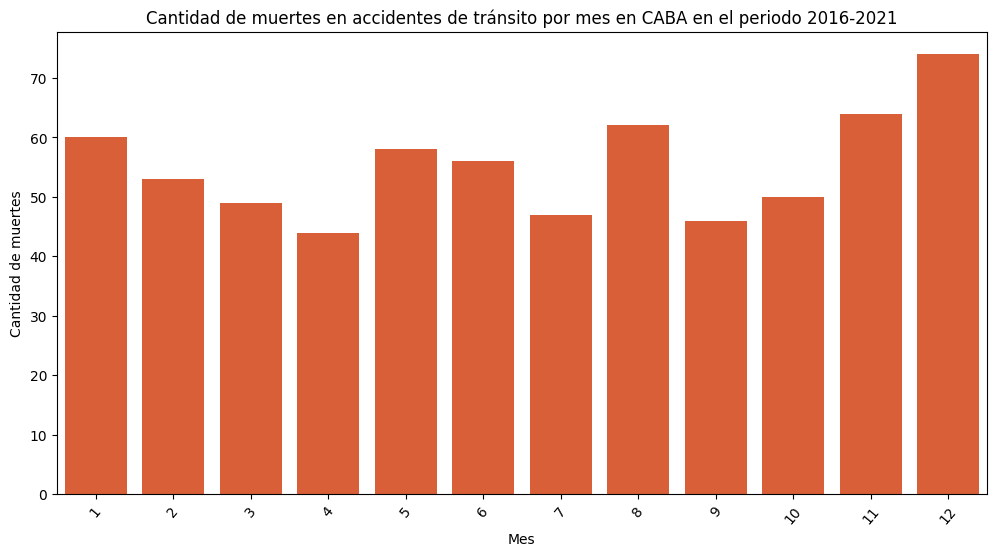

In [116]:
#Indentificar la cantidad de victimas mortales en accidentes de tránsito por mes durante el periodo investigado
victimas_mes = df_victimas['MM'].value_counts().sort_index()
# Se ajusta el tamaño del gráfico
plt.figure(figsize=(12, 6))  

# Graficar los datos
sns.barplot(x=victimas_mes.index, y=victimas_mes.values, color='#F4511E')
plt.xticks(rotation=50)

plt.xlabel('Mes')
plt.ylabel('Cantidad de muertes')
plt.title('Cantidad de muertes en accidentes de tránsito por mes en CABA en el periodo 2016-2021')
plt.savefig('muertes_mes.png')

plt.show()


In [117]:
#Análisis cruzado entre las victimas por mes y el medio donde se transportaba la victima
pd.pivot_table(df_victimas, values='N_VICTIMAS', index=['MM'], columns=['VICTIMA'],aggfunc="sum")
#TABLA2

VICTIMA,AUTO,BICICLETA,CARGAS,MOTO,MOVIL,PASAJEROS,PEATON,SD
MM,,,,,,,,
1,4.0,2.0,1.0,38.0,NaN,NaN,15.0,NaN
2,8.0,NaN,NaN,24.0,NaN,1.0,20.0,NaN
3,10.0,2.0,NaN,20.0,2.0,NaN,14.0,1.0
4,6.0,1.0,NaN,18.0,NaN,NaN,19.0,NaN
5,5.0,2.0,1.0,21.0,NaN,NaN,29.0,NaN
6,7.0,1.0,NaN,25.0,NaN,1.0,21.0,1.0
7,8.0,3.0,1.0,12.0,NaN,NaN,22.0,1.0
8,8.0,2.0,NaN,25.0,NaN,NaN,26.0,1.0
9,12.0,4.0,NaN,14.0,NaN,NaN,16.0,NaN


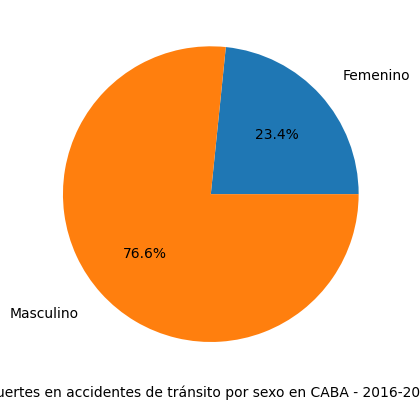

In [118]:
#Indentificar la cantidad de victimas mortales en accidentes de tránsito por sexo
victimas_sexo = df_victimas['SEXO'].value_counts().sort_index()
name='Femenino','Masculino'

# Graficar los datos
plt.pie(victimas_sexo, labels=name, labeldistance=1.2,autopct="%1.1f%%")
plt.xlabel("Muertes en accidentes de tránsito por sexo en CABA - 2016-2021")
plt.savefig("muertes_sexo.png")
plt.show()

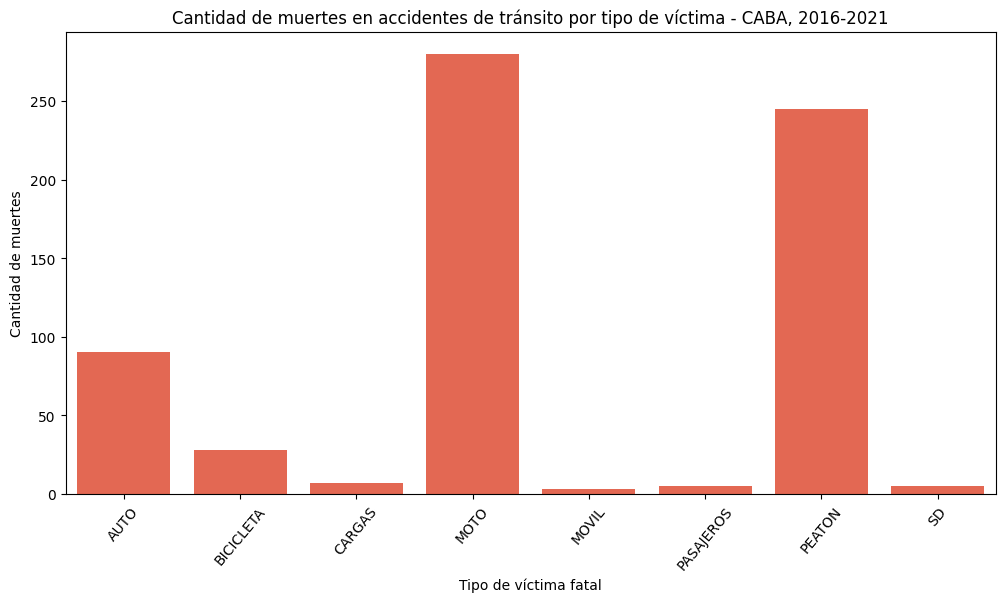

In [19]:
#Indentificar la cantidad de victimas mortales en accidentes de tránsito por el rol en el vehículo en el que fallece
victimas = df_victimas['VICTIMA'].value_counts().sort_index()
# Se ajusta el tamaño del gráfico
plt.figure(figsize=(12, 6))  

# Graficar los datos
sns.barplot(x=victimas.index, y=victimas.values, color='#fb573b')
plt.xticks(rotation=50)

plt.xlabel('Tipo de víctima fatal')
plt.ylabel('Cantidad de muertes')
plt.title('Cantidad de muertes en accidentes de tránsito por tipo de víctima - CABA, 2016-2021')
plt.savefig('muertes_victima.png')

# Invertir el eje Y con el eje X
#plt.gca().invert_xaxis()  

# Mostrar el gráfico
plt.show()

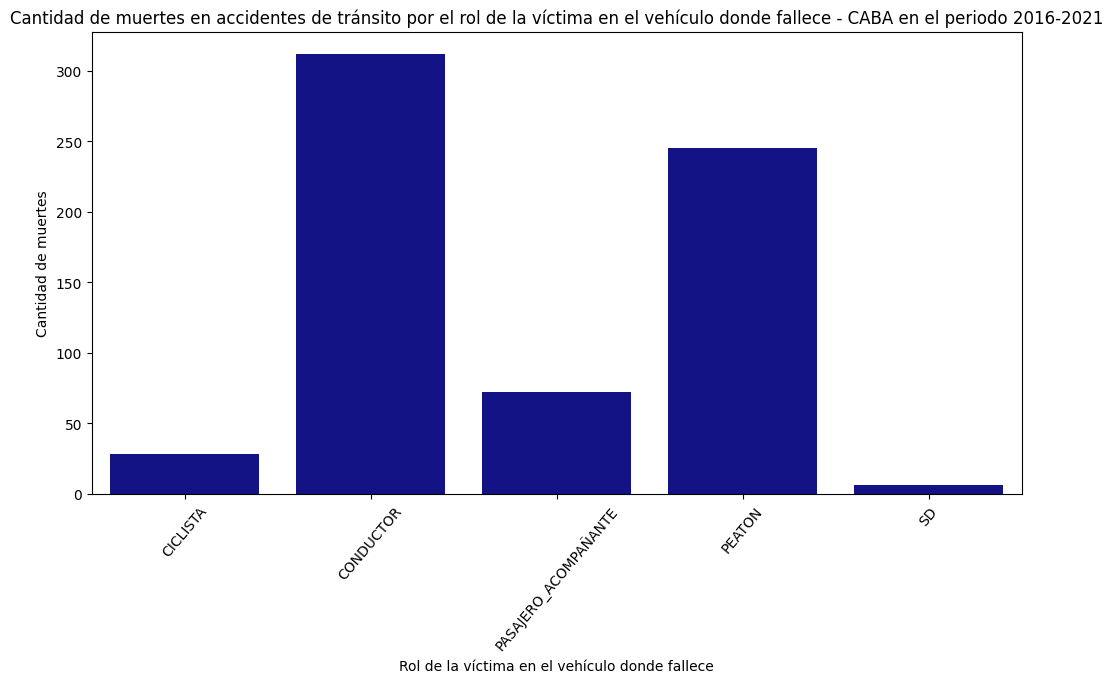

In [16]:
#Indentificar la cantidad de victimas mortales en accidentes de tránsito por el rol en el vehículo en el que fallece
victimas_rol = df_victimas['ROL'].value_counts().sort_index()
# Se ajusta el tamaño del gráfico
plt.figure(figsize=(12, 6))  

# Graficar los datos
sns.barplot(x=victimas_rol.index, y=victimas_rol.values, color='#000099')
plt.xticks(rotation=50)

plt.xlabel('Rol de la víctima en el vehículo donde fallece')
plt.ylabel('Cantidad de muertes')
plt.title('Cantidad de muertes en accidentes de tránsito por el rol de la víctima en el vehículo donde fallece - CABA en el periodo 2016-2021')
plt.savefig('muertes_rol.png')

plt.show()

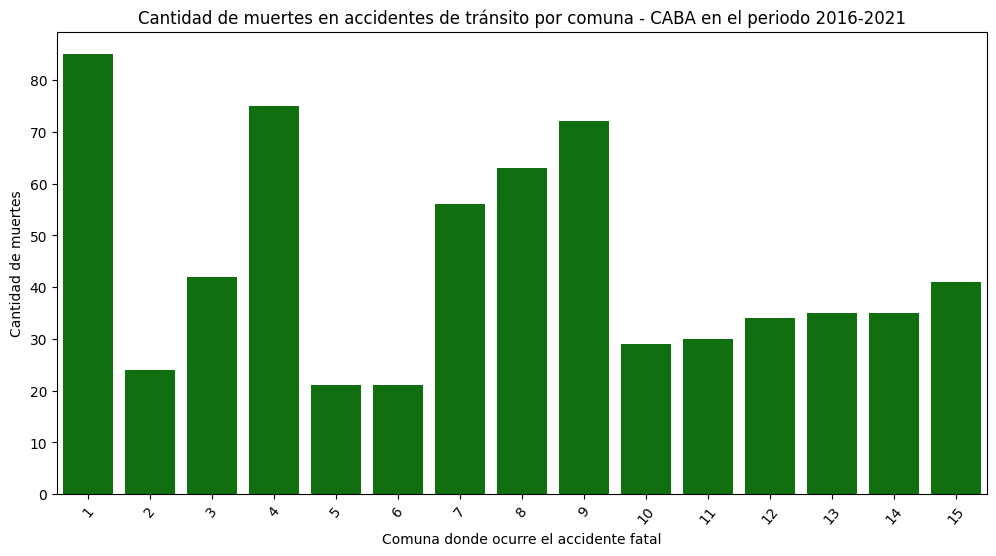

In [17]:
#Indentificar la cantidad de victimas mortales en accidentes de tránsito por el rol en el vehículo en el que fallece
victimas_comuna = df_victimas['COMUNA'].value_counts().sort_index()
# Se ajusta el tamaño del gráfico
plt.figure(figsize=(12, 6))  

# Graficar los datos
sns.barplot(x=victimas_comuna.index, y=victimas_comuna.values, color='green')
plt.xticks(rotation=50)

plt.xlabel('Comuna donde ocurre el accidente fatal')
plt.ylabel('Cantidad de muertes')
plt.title('Cantidad de muertes en accidentes de tránsito por comuna - CABA en el periodo 2016-2021')
plt.savefig('muertes_comuna.png')

# Invertir el eje Y con el eje X
#plt.gca().invert_xaxis()  

# Mostrar el gráfico
plt.show()

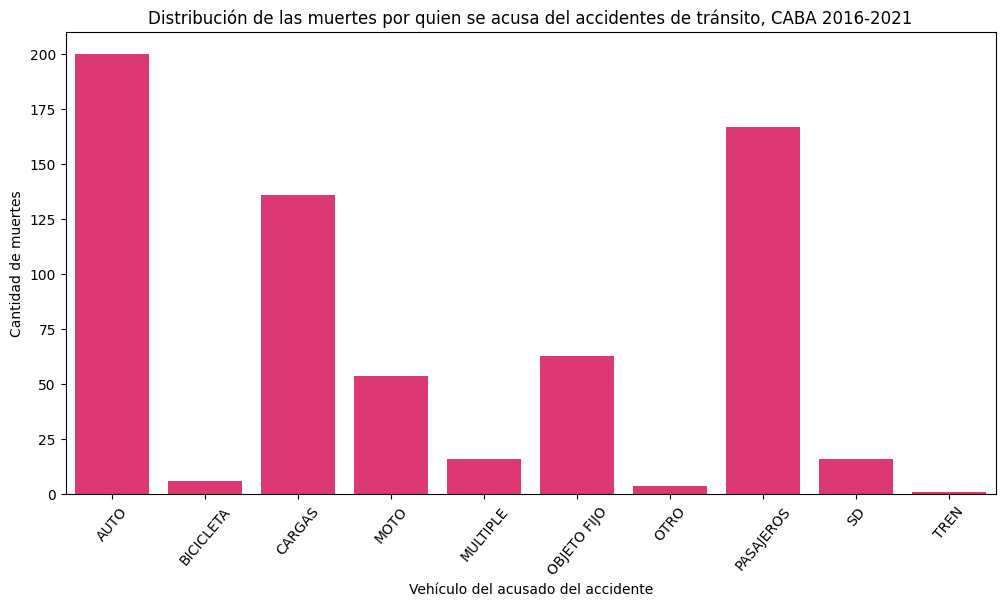

In [14]:
#Indentificar la cantidad de victimas mortales en accidentes de tránsito por mes durante el periodo investigado
acusado = df_victimas['ACUSADO'].value_counts().sort_index()
# Se ajusta el tamaño del gráfico
plt.figure(figsize=(12, 6))  

# Graficar los datos
sns.barplot(x=acusado.index, y=acusado.values, color='#f71e6c')
plt.xticks(rotation=50)

plt.xlabel('Vehículo del acusado del accidente')
plt.ylabel('Cantidad de muertes')
plt.title('Distribución de las muertes por quien se acusa del accidentes de tránsito, CABA 2016-2021')
plt.savefig('acusados.png')

plt.show()

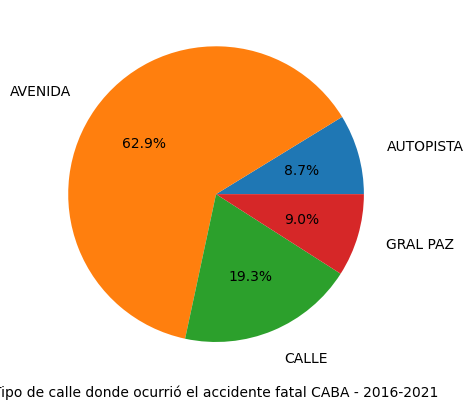

In [15]:
#Indentificar la cantidad de victimas mortales en accidentes de tránsito por sexo
victimas_calle = df_victimas['TIPO_DE_CALLE'].value_counts().sort_index()
name='AUTOPISTA','AVENIDA','CALLE','GRAL PAZ'

# Graficar los datos
plt.pie(victimas_calle, labels=name, labeldistance=1.2,autopct="%1.1f%%")
plt.xlabel("Tipo de calle donde ocurrió el accidente fatal CABA - 2016-2021")
plt.savefig("muertes_calle.png")
plt.show()

In [32]:
#Cambio de formato de algunas variables de interés
df_victimas['AAAA'] = df_victimas['AAAA'].astype(int).astype(str)
df_victimas['MM'] = df_victimas['MM'].astype(int).astype(str)
df_victimas['DD'] = df_victimas['DD'].astype(int).astype(str)
df_victimas['COMUNA'] = df_victimas['COMUNA'].astype(int).astype(str)
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     663 non-null    object        
 1   FECHA                  663 non-null    datetime64[ns]
 2   AAAA                   663 non-null    object        
 3   MM                     663 non-null    object        
 4   DD                     663 non-null    object        
 5   ROL                    663 non-null    object        
 6   VICTIMA                663 non-null    object        
 7   SEXO                   663 non-null    object        
 8   EDAD                   663 non-null    int64         
 9   FECHA_FALLECIMIENTO    663 non-null    object        
 10  N_VICTIMAS             663 non-null    int64         
 11  HORA                   663 non-null    object        
 12  HH                     663 non-null    int64         
 13  TIPO_

In [91]:
#Análisis descriptivo de la variable Edad
df_victimas.describe()


,FECHA,EDAD,N_VICTIMAS,HH
count,663,663.000000,663.000000,663.000000
mean,2018-09-15 18:53:45.339366656,42.194570,1.058824,11.662142
min,2016-01-01 00:00:00,1.000000,1.000000,0.000000
25%,2017-04-25 00:00:00,27.000000,1.000000,6.000000
50%,2018-07-01 00:00:00,37.000000,1.000000,11.000000
75%,2020-01-08 00:00:00,56.500000,1.000000,17.500000
max,2021-12-30 00:00:00,95.000000,3.000000,23.000000
std,NaN,19.790363,0.253989,6.649662


In [21]:
#Análisis cruzado entre las victimas por mes y el medio donde se transportaba la victima
pd.pivot_table(df_victimas, values='N_VICTIMAS', index=['AAAA'], columns=['VICTIMA'],aggfunc="sum")
#TABLA1

VICTIMA,AUTO,BICICLETA,CARGAS,MOTO,MOVIL,PASAJEROS,PEATON,SD
AAAA,,,,,,,,
2016,18.0,4.0,3.0,57.0,1.0,1.0,45.0,1.0
2017,24.0,4.0,2.0,53.0,NaN,NaN,46.0,4.0
2018,16.0,3.0,2.0,53.0,2.0,2.0,63.0,NaN
2019,10.0,6.0,NaN,44.0,NaN,1.0,30.0,NaN
2020,11.0,5.0,NaN,27.0,NaN,NaN,32.0,NaN
2021,11.0,6.0,NaN,46.0,NaN,1.0,29.0,NaN


In [121]:
#Análisis cruzado entre las victimas por sexo y ciclo de vida con el medio de transporte al momento del accidente
pd.pivot_table(df_victimas, values='N_VICTIMAS', index=['SEXO', 'ciclo_vida'], columns=['VICTIMA'],aggfunc="sum")
#TABLA6

VICTIMA                 AUTO  BICICLETA  CARGAS   MOTO  MOVIL  PASAJEROS   
SEXO      ciclo_vida                                                       
FEMENINO  Adolescentes   1.0        NaN     NaN    2.0    NaN        NaN  \
          Adultos        9.0        5.0     NaN   16.0    NaN        NaN   
          Ancianos       2.0        1.0     NaN    1.0    NaN        3.0   
          Jóvenes        3.0        1.0     NaN   15.0    NaN        NaN   
          Niños          NaN        NaN     NaN    NaN    NaN        NaN   
MASCULINO Adolescentes   1.0        1.0     NaN    3.0    NaN        NaN   
          Adultos       41.0       10.0     6.0  137.0    2.0        NaN   
          Ancianos      14.0        2.0     1.0    3.0    NaN        1.0   
          Infantes       1.0        1.0     NaN    NaN    NaN        NaN   
          Jóvenes       17.0        7.0     NaN  103.0    1.0        1.0   
          Niños          1.0        NaN     NaN    NaN    NaN        NaN   

VICTIMA                 PEATON   SD  
SEXO      ciclo_vida                 
FEMENINO  Adolescentes     2.0  NaN  
          Adultos         34.0  NaN  
          Ancianos        53.0  NaN  
          Jóvenes          6.0  NaN  
          Niños            1.0  NaN  
MASCULINO Adolescentes     4.0  NaN  
          Adultos         67.0  1.0  
          Ancianos        55.0  3.0  
          Infantes         3.0  NaN  
          Jóvenes         18.0  1.0  
          Niños            2.0  NaN

In [33]:
#Análisis cruzado entre las victimas por sexo y ciclo de vida y horario del accidente
pd.pivot_table(df_victimas, values='N_VICTIMAS', index=['SEXO', 'ciclo_vida'], columns=['Horario'],aggfunc="sum")
#TABLA/

Horario                 Mañana  Noche  Tarde
SEXO      ciclo_vida                        
FEMENINO  Adolescentes     1.0    3.0    1.0
          Adultos         20.0   26.0   18.0
          Ancianos        22.0   11.0   27.0
          Jóvenes          8.0   13.0    4.0
          Niños            NaN    NaN    1.0
MASCULINO Adolescentes     3.0    3.0    3.0
          Adultos         77.0  135.0   52.0
          Ancianos        22.0   34.0   23.0
          Infantes         2.0    1.0    2.0
          Jóvenes         42.0   78.0   28.0
          Niños            NaN    3.0    NaN

In [36]:
#Análisis cruzado entre las victimas ciclo de vida y comuna
pd.pivot_table(df_victimas, values='N_VICTIMAS', index=['ciclo_vida'], columns=['COMUNA'],aggfunc="sum")
#TABLA9

COMUNA,1,10,11,12,13,14,15,2,3,4,5,6,7,8,9
ciclo_vida,,,,,,,,,,,,,,,
Adolescentes,2.0,NaN,1.0,1.0,NaN,2.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,1.0,3.0
Adultos,47.0,13.0,13.0,18.0,20.0,16.0,13.0,7.0,23.0,32.0,11.0,10.0,28.0,42.0,35.0
Ancianos,18.0,7.0,5.0,3.0,10.0,6.0,11.0,10.0,9.0,16.0,9.0,5.0,7.0,4.0,19.0
Infantes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,1.0
Jóvenes,18.0,9.0,11.0,11.0,5.0,11.0,15.0,7.0,7.0,26.0,1.0,6.0,17.0,16.0,13.0
Niños,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0


In [23]:
#Análisis cruzado entre las victimas por sexo y el rol en el accidente con la vía donde ocurrióm el accidente
pd.pivot_table(df_victimas, values='N_VICTIMAS', index=['SEXO', 'TIPO_DE_CALLE'], columns=['VICTIMA'],aggfunc="sum")

VICTIMA                  AUTO  BICICLETA  CARGAS   MOTO  MOVIL  PASAJEROS   
SEXO      TIPO_DE_CALLE                                                     
FEMENINO  AUTOPISTA       2.0        NaN     NaN    4.0    NaN        NaN  \
          AVENIDA        10.0        2.0     NaN   22.0    NaN        2.0   
          CALLE           NaN        5.0     NaN    3.0    NaN        1.0   
          GRAL PAZ        3.0        NaN     NaN    5.0    NaN        NaN   
MASCULINO AUTOPISTA       8.0        NaN     2.0   33.0    NaN        NaN   
          AVENIDA        41.0       15.0     2.0  142.0    3.0        2.0   
          CALLE          11.0        6.0     1.0   46.0    NaN        NaN   
          GRAL PAZ       15.0        NaN     2.0   25.0    NaN        NaN   

VICTIMA                  PEATON   SD  
SEXO      TIPO_DE_CALLE               
FEMENINO  AUTOPISTA         1.0  NaN  
          AVENIDA          67.0  NaN  
          CALLE            27.0  NaN  
          GRAL PAZ          1.0  NaN  
MASCULINO AUTOPISTA         8.0  NaN  
          AVENIDA         108.0  1.0  
          CALLE            25.0  3.0  
          GRAL PAZ          8.0  1.0

In [38]:
#Análisis cruzado entre las victimas por sexo y el rol en el accid'TIPO_DE_CALLE'ente con la vía donde ocurrióm el accidente
pd.pivot_table(df_victimas, values='N_VICTIMAS', index=['TIPO_DE_CALLE','Horario'], columns=['COMUNA'],aggfunc="sum")

COMUNA                    1   10    11   12   13    14    15    2     3     4   
TIPO_DE_CALLE Horario                                                           
AUTOPISTA     Mañana    1.0  1.0   NaN  NaN  2.0   1.0   1.0  1.0   NaN   3.0  \
              Noche     7.0  1.0   NaN  NaN  2.0   2.0   NaN  1.0   1.0   3.0   
              Tarde     1.0  1.0   NaN  NaN  1.0   NaN   NaN  NaN   NaN   2.0   
AVENIDA       Mañana   13.0  5.0  10.0  6.0  6.0   9.0   8.0  5.0   9.0  12.0   
              Noche    26.0  4.0   7.0  3.0  8.0  13.0  20.0  8.0  11.0  26.0   
              Tarde    14.0  6.0   NaN  5.0  6.0   3.0   8.0  7.0   5.0  11.0   
CALLE         Mañana    6.0  3.0   3.0  2.0  1.0   2.0   2.0  1.0   4.0   4.0   
              Noche     8.0  5.0   2.0  NaN  3.0   5.0   1.0  NaN   7.0  10.0   
              Tarde     9.0  3.0   2.0  1.0  1.0   NaN   1.0  1.0   5.0   4.0   
GRAL PAZ      Mañana    NaN  NaN   3.0  2.0  3.0   NaN   NaN  NaN   NaN   NaN   
              Noche     NaN  NaN   2.0  9.0  2.0   NaN   NaN  NaN   NaN   NaN   
              Tarde     NaN  NaN   1.0  6.0  NaN   NaN   NaN  NaN   NaN   NaN   

COMUNA                   5    6     7     8     9  
TIPO_DE_CALLE Horario                              
AUTOPISTA     Mañana   NaN  NaN   2.0   NaN   4.0  
              Noche    NaN  NaN   2.0   5.0   7.0  
              Tarde    2.0  NaN   NaN   1.0   3.0  
AVENIDA       Mañana   4.0  6.0  10.0  16.0   8.0  
              Noche    4.0  7.0  24.0  17.0  17.0  
              Tarde    3.0  3.0  10.0   7.0   7.0  
CALLE         Mañana   1.0  1.0   3.0   NaN   4.0  
              Noche    4.0  3.0   2.0   NaN   2.0  
              Tarde    3.0  1.0   3.0   1.0   4.0  
GRAL PAZ      Mañana   NaN  NaN   NaN   4.0   5.0  
              Noche    NaN  NaN   NaN   9.0   7.0  
              Tarde    NaN  NaN   NaN   3.0   4.0

In [8]:
#Análisis cruzado entre las victimas por comuna en la que ocurrió el accidente
pd.pivot_table(df_victimas, values='N_VICTIMAS', index=['COMUNA'], columns=['VICTIMA'],aggfunc="sum")
#TABLA4

VICTIMA,AUTO,BICICLETA,CARGAS,MOTO,MOVIL,PASAJEROS,PEATON,SD
COMUNA,,,,,,,,
1,5.0,3.0,1.0,32.0,1.0,NaN,43.0,NaN
10,4.0,2.0,NaN,15.0,NaN,1.0,7.0,NaN
11,3.0,1.0,1.0,18.0,NaN,NaN,7.0,NaN
12,5.0,1.0,1.0,20.0,NaN,NaN,7.0,NaN
13,4.0,1.0,NaN,13.0,NaN,2.0,15.0,NaN
14,3.0,2.0,NaN,15.0,NaN,NaN,15.0,NaN
15,3.0,NaN,NaN,18.0,NaN,1.0,19.0,NaN
2,2.0,3.0,NaN,5.0,NaN,NaN,14.0,NaN
3,6.0,3.0,NaN,20.0,NaN,NaN,13.0,NaN


In [22]:
#Análisis cruzado entre las victimas por sexo y ciclo de vida con el medio de transporte al momento del accidente
pd.pivot_table(df_victimas, values='N_VICTIMAS', index=['SEXO', 'ROL'], columns=['VICTIMA'],aggfunc="sum")
#TABLA3

VICTIMA                         AUTO  BICICLETA  CARGAS   MOTO  MOVIL   
SEXO      ROL                                                           
FEMENINO  CICLISTA               NaN        7.0     NaN    NaN    NaN  \
          CONDUCTOR              5.0        NaN     NaN   15.0    NaN   
          PASAJERO_ACOMPAÑANTE  10.0        NaN     NaN   18.0    NaN   
          PEATON                 NaN        NaN     NaN    NaN    NaN   
          SD                     NaN        NaN     NaN    1.0    NaN   
MASCULINO CICLISTA               NaN       21.0     NaN    NaN    NaN   
          CONDUCTOR             58.0        NaN     3.0  230.0    1.0   
          PASAJERO_ACOMPAÑANTE  17.0        NaN     4.0   16.0    2.0   
          PEATON                 NaN        NaN     NaN    NaN    NaN   
          SD                     NaN        NaN     NaN    NaN    NaN   

VICTIMA                         PASAJEROS  PEATON   SD  
SEXO      ROL                                           
FEMENINO  CICLISTA                    NaN     NaN  NaN  
          CONDUCTOR                   NaN     NaN  NaN  
          PASAJERO_ACOMPAÑANTE        3.0     NaN  NaN  
          PEATON                      NaN    96.0  NaN  
          SD                          NaN     NaN  NaN  
MASCULINO CICLISTA                    NaN     NaN  NaN  
          CONDUCTOR                   NaN     NaN  NaN  
          PASAJERO_ACOMPAÑANTE        2.0     NaN  NaN  
          PEATON                      NaN   149.0  NaN  
          SD                          NaN     NaN  5.0

In [9]:
#Análisis cruzado entre las victimas por comuna y el tipo de calle donde ocurrió el accidente
pd.pivot_table(df_victimas, values='N_VICTIMAS', index=['TIPO_DE_CALLE'], columns=['VICTIMA'],aggfunc="sum")
#TABLA5

VICTIMA,AUTO,BICICLETA,CARGAS,MOTO,MOVIL,PASAJEROS,PEATON,SD
TIPO_DE_CALLE,,,,,,,,
AUTOPISTA,10.0,NaN,2.0,37.0,NaN,NaN,9.0,NaN
AVENIDA,51.0,17.0,2.0,164.0,3.0,4.0,175.0,1.0
CALLE,11.0,11.0,1.0,49.0,NaN,1.0,52.0,3.0
GRAL PAZ,18.0,NaN,2.0,30.0,NaN,NaN,9.0,1.0


In [24]:
#Guardamos el DF en un archivo de excel
df_victimas=df_victimas.to_excel("victimas.xlsx", index=False)

In [83]:
df_victimas